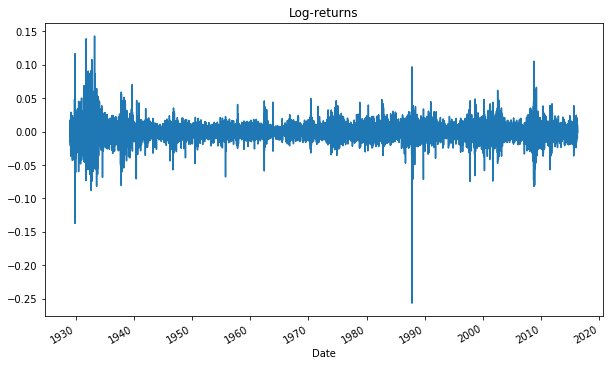

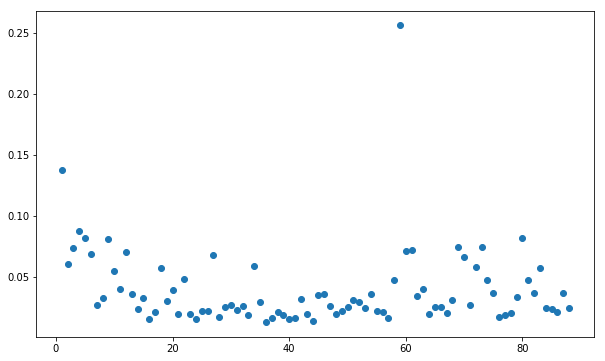

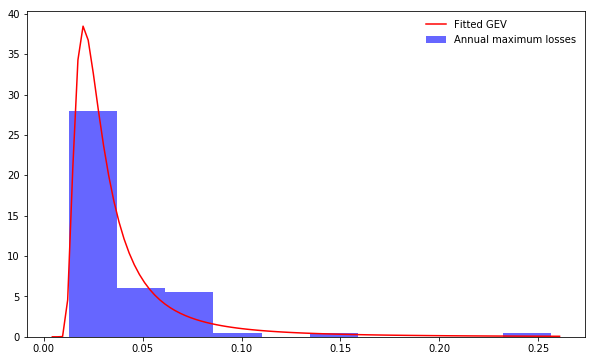

Shape
0.54260248823203
Location
0.024357564214084332
Scale
0.010833982655728137


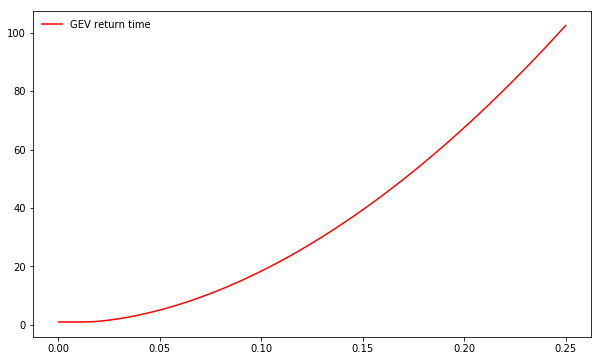

Return time (years) of an annual maximum loss higher than 8 percent =12.141


In [30]:
#This program applies the Block Maxima method to annual losses of DJIA

import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import genextreme as gev
from scipy import stats
from scipy.stats import kstest

import quandl 
df = quandl.get("BCB/UDJIAD1", start_date="1929-01-01", end_date="2018-12-31")

log_returns = np.log(1 + df.pct_change())
log_returns.plot(figsize=(10, 6),legend = False, title='Log-returns');

max_loss= -log_returns.resample('Y').min()


max=np.array(max_loss)

t = np.linspace(1,np.size(max_loss),np.size(max_loss))

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(t, max_loss,"o")
plt.show()

fit= gev.fit(max_loss)

fig, ax = plt.subplots(figsize=(10, 6))
m=np.max(max_loss)
#plot the fit
shape, loc, scale = gev.fit(max_loss)
l = loc + scale / shape
x = np.linspace(l+0.00001, l+0.00001+m, num=100)
plt.plot(x, gev.pdf(x, *fit),color='r', label='Fitted GEV')
plt.hist(max,normed=True, alpha=0.6,color='blue', label='Annual maximum losses')
ax.legend(loc='best', frameon=False)
#x.plot(t, pdf)
plt.show()

print('Shape')
shape=-shape
print(shape)

print('Location')

print(loc)

print('Scale')

print(scale)
fig, ax = plt.subplots(figsize=(10, 6))
x = np.linspace(0, 0.25, num=len(max_loss))

time=1/(1-gev.cdf(x,*fit))

plt.plot(x,time,color='r', label='GEV return time')

ax.legend(loc='best', frameon=False)
plt.show()

ret=1/(1-gev.cdf(0.08,*fit))
print('Return time (years) of an annual maximum loss higher than 8 percent =%.3f' %ret )
